In [1]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\User\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

## Preparando os DataFrames para 333 para as analises de área


In [2]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos333_ativos = prceossos_ativos.merge(eventos333,how='inner',on='DSProcesso')
#Transformando o campo de data do evento333 em datetime
processos333_ativos['Data'] = pd.to_datetime(processos333_ativos.DTEvento).dt.year
#Filtrando os processos 333 ativos com a base de ouro:
processos333_ativos_ouro = processos333_ativos[processos333_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(processos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = processos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_333_regiao['QTAreaHA'] = join_333_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
join_333_regiao

C:\Users\User\AppData\Local\Temp\ipykernel_3496\2493657228.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3496\2493657228.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]


,Unnamed: 0_x,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,...,Unnamed: 0_y,IDEvento,DTEvento,Evento_,Data,Unnamed: 0,IDMunicipio,Municipios,UF,Regiao
1,10544,815.187/2022,815187,2022,S,48066.815187/2022-24,2.0,5,11,48066.0,...,1526270,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214686,4206306,GUABIRUBA,SC,Sul
3,10587,815.188/2022,815188,2022,S,48066.815188/2022-79,2.0,5,11,48066.0,...,1526692,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214745,4206306,GUABIRUBA,SC,Sul
4,10630,815.189/2022,815189,2022,S,48066.815189/2022-13,2.0,5,11,48066.0,...,1527201,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214795,4202909,BRUSQUE,SC,Sul
5,56386,820.434/2007,820434,2007,S,48402.820434/2007-15,2.0,5,2,48402.0,...,2058950,333,2007-07-05,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2007,271133,3523305,ITARIRI,SP,Sudeste
6,65703,820.657/2006,820657,2006,S,48402.820657/2006-93,2.0,5,2,48402.0,...,2172757,333,2006-09-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2006,282792,3523305,ITARIRI,SP,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,842873,806.127/2015,806127,2015,S,48422.806127/2015-95,24.0,6,22,48422.0,...,820903,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2015,115989,2112407,TURIAÇU,MA,Nordeste
19040,843322,806.146/2021,806146,2021,S,48078.806146/2021-27,2.0,5,22,48078.0,...,826075,333,2021-11-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116533,2103158,CENTRO DO GUILHERME,MA,Nordeste
19041,843502,806.155/2021,806155,2021,S,48078.806155/2021-18,2.0,5,22,48078.0,...,827764,333,2021-12-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116744,2103158,CENTRO DO GUILHERME,MA,Nordeste
19042,843697,806.165/2021,806165,2021,S,48078.806165/2021-53,2.0,5,22,48078.0,...,829788,333,2021-12-13,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116978,2103174,CENTRO NOVO DO MARANHÃO,MA,Nordeste


## Plotando agora os mesmos gráficos mas para área 

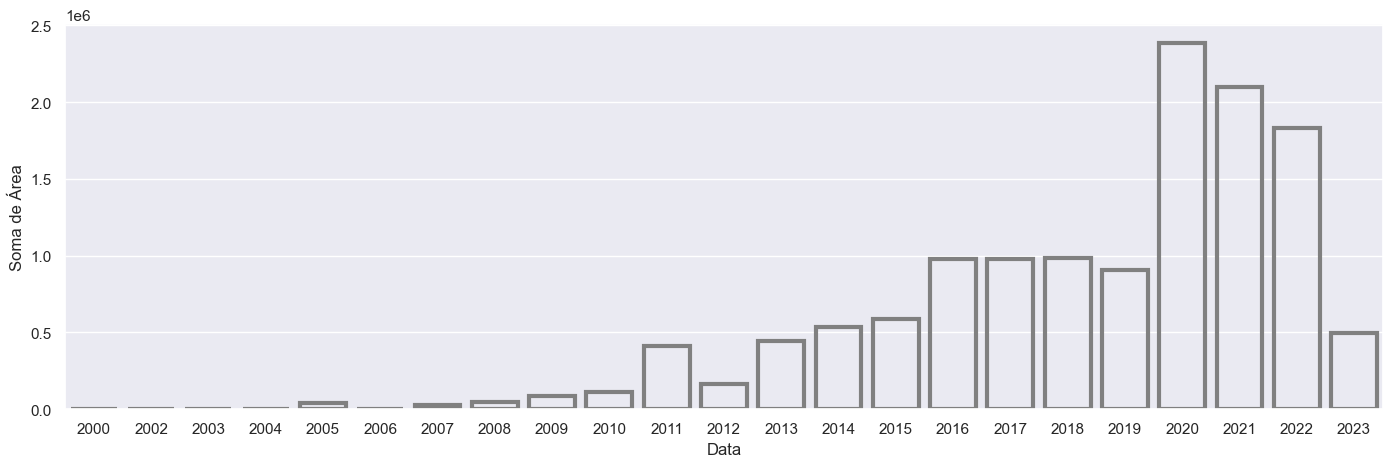

In [51]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})

#Agrupando os valores de area por ano e somando
area_pedida_333 = join_333_regiao.query('Data >= 2000').groupby('Data').sum()

y = sns.barplot(
    data=area_pedida_333, x=area_pedida_333.index, y="QTAreaHA", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)
y.set(xlabel='Data', ylabel='Soma de Área')



plt.show()

In [52]:
area_pedida_333.QTAreaHA.sum()

13140341.92

# PLOTAR SEPARADO PARA REGIAO NORTE E CENTRO OESTE

In [14]:
#Para Regiao Norte

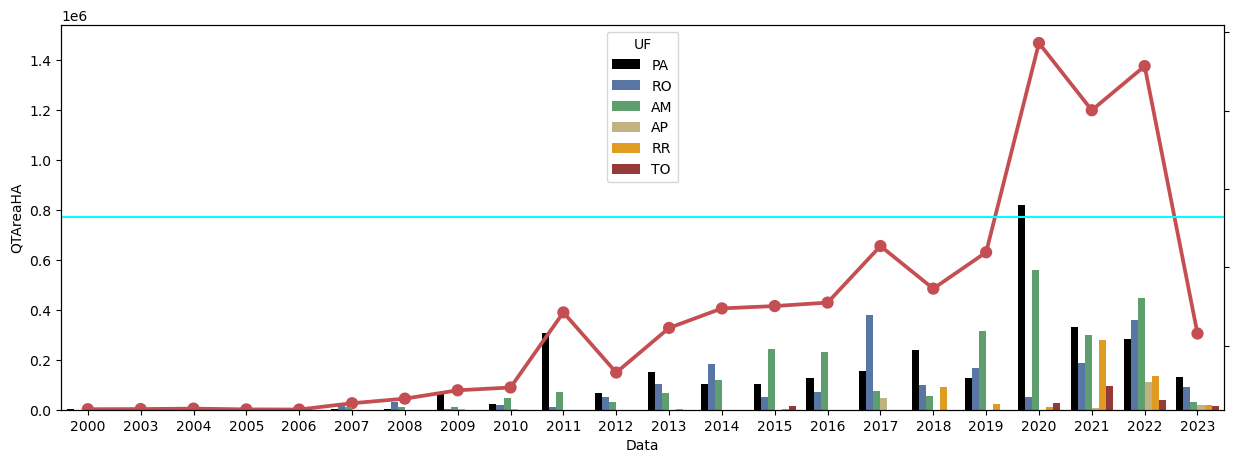

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


data_regiao_333= join_333_regiao.query('Data >= 2000').query('Regiao == "Norte" ').groupby(['Data','Regiao','UF'], as_index=False).sum()

palette_norte = {'PA':'black','RO':'b','AM':'g','AP':'y','RR':'orange','TO':'brown'}
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )


fig, ax1 = plt.subplots(figsize=(15,5))
sns.pointplot(data=data_regiao_333.groupby(['Data'],as_index=False)['QTAreaHA'].sum(), x="Data", y="QTAreaHA",ax=ax1,
             color ='r')


ax2 = ax1.twinx()
sns.barplot(data=data_regiao_333, x="Data", y="QTAreaHA",hue='UF',dodge=True,palette = palette_norte,ax=ax1)
ax2.axhline(data_regiao_333.query('Data >= 2000')['QTAreaHA'].mean(),color ='cyan')

ax2.set(yticklabels=[])
plt.show()

In [53]:
data_regiao_333.groupby(['UF'])['QTAreaHA'].sum().sort_values(ascending=True)
#data_regiao_333.QTAreaHA.sum()

UF
AP     189022.83
TO     196225.92
RR     565054.49
RO    1871092.05
AM    2618914.48
PA    3041086.62
Name: QTAreaHA, dtype: float64

In [61]:
#Para Regiao Centro Oeste
data_regiao_333= join_333_regiao.query('Data >= 2000').query('Regiao == "Centro_Oeste" ').groupby(['Data','Regiao','UF'], as_index=False).sum()
data_regiao_333.groupby(['UF'])['QTAreaHA'].sum().sort_values(ascending=True)
#data_regiao_333.QTAreaHA.sum()

UF
MS         48.91
GO     201559.41
MT    4345591.12
Name: QTAreaHA, dtype: float64

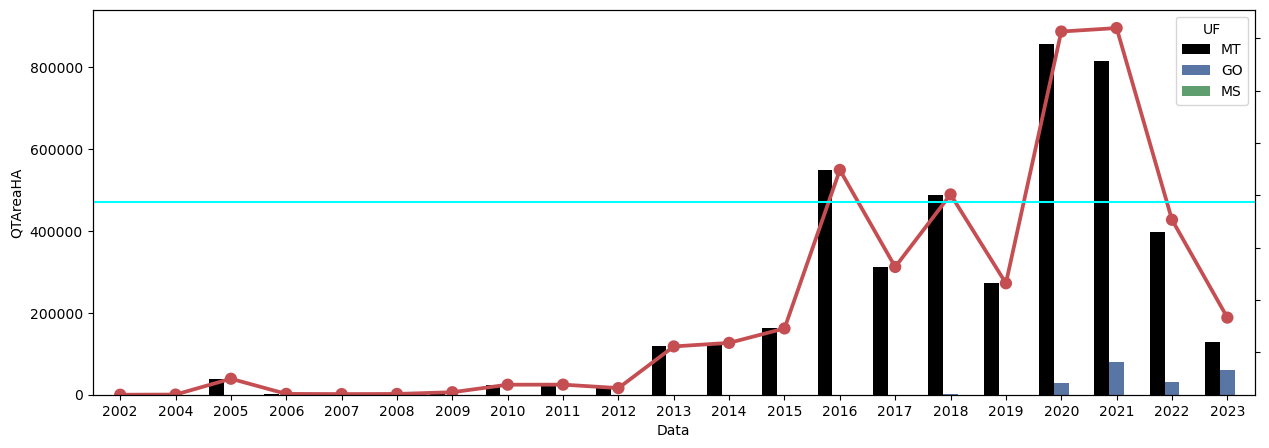

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


data_regiao_333= join_333_regiao.query('Data >= 2000').query('Regiao == "Centro_Oeste" ').groupby(['Data','Regiao','UF'], as_index=False).sum()

palette_norte = {'MT':'black','GO':'b','MS':'g'}
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )


fig, ax1 = plt.subplots(figsize=(15,5))
sns.pointplot(data=data_regiao_333.groupby(['Data'],as_index=False)['QTAreaHA'].sum(), x="Data", y="QTAreaHA",ax=ax1,
             color ='r')


ax2 = ax1.twinx()
sns.barplot(data=data_regiao_333, x="Data", y="QTAreaHA",hue='UF',dodge=True,palette = palette_norte,ax=ax1)
ax2.axhline(data_regiao_333.query('Data >= 2000')['QTAreaHA'].mean(),color ='cyan')

ax2.set(yticklabels=[])
plt.show()

## Plotando a área por ano mas quebrando para Regiao e um plot de Regiao quebrando por UF

## Preparando os dados para analisar area 513

In [62]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos513 = eventos.query('IDEvento == 513')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos513_ativos = prceossos_ativos.merge(eventos513,how='inner',on='DSProcesso')
#Transformando o campo de data do evento513 em datetime
processos513_ativos['Data'] = pd.to_datetime(processos513_ativos.DTEvento).dt.year
#Filtrando os processos 513 ativos com a base de ouro:
processos513_ativos_ouro = processos513_ativos[processos513_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_513 = mun[mun['DSProcesso'].isin(processos513_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_513_regiao = processos513_ativos_ouro.merge(mun_ouro_ativo_513,on='DSProcesso',how='inner')
join_513_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_513_regiao['QTAreaHA'] = join_513_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
full_join = join_513_regiao.merge(join_333_regiao,how='inner',on='DSProcesso')
full_join

C:\Users\User\AppData\Local\Temp\ipykernel_3496\497865117.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3496\497865117.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]


,Unnamed: 0_x_x,DSProcesso,NRProcesso_x,NRAnoProcesso_x,BTAtivo_x,NRNUP_x,IDTipoRequerimento_x,IDFaseProcesso_x,IDUnidadeAdministrativaRegional_x,IDUnidadeProtocolizadora_x,...,Unnamed: 0_y_y,IDEvento_y,DTEvento_y,Evento__y,Data_y,Unnamed: 0_y,IDMunicipio_y,Municipios_y,UF_y,Regiao_y
0,129101,830.386/2022,830386,2022,S,48054.830386/2022-00,24.0,6,3,48054.0,...,4486939,333,2022-03-22,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,362711,3152105,PONTE NOVA,MG,Sudeste
1,141579,830.663/2013,830663,2013,S,48403.830663/2013-78,2.0,6,3,48403.0,...,4617316,333,2013-03-07,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2013,378739,3121605,DIAMANTINA,MG,Sudeste
2,155031,830.963/2020,830963,2020,S,48054.830963/2020-93,24.0,6,3,48054.0,...,4755904,333,2020-07-29,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2020,395983,3121001,DATAS,MG,Sudeste
3,160760,831.093/2015,831093,2015,S,48403.831093/2015-03,2.0,6,3,48403.0,...,4812449,333,2015-05-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2015,403226,3152303,PORTO FIRME,MG,Sudeste
4,168567,831.278/2015,831278,2015,S,48403.831278/2015-18,2.0,6,3,48403.0,...,4893130,333,2015-05-20,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2015,413184,3121605,DIAMANTINA,MG,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,747564,650.683/1999,650683,1999,S,27205.650683/1999-14,2.0,6,5,27205.0,...,80718,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1999,7362,1503606,ITAITUBA,PA,Norte
2259,747572,650.687/1999,650687,1999,S,27205.650687/1999-01,2.0,6,5,27205.0,...,80752,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1999,7370,1503606,ITAITUBA,PA,Norte
2260,747582,650.692/1999,650692,1999,S,27205.650692/1999-13,2.0,6,5,27205.0,...,80794,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1999,7380,1503606,ITAITUBA,PA,Norte
2261,747584,650.693/1999,650693,1999,S,27205.650693/1999-50,2.0,6,5,27205.0,...,80807,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1999,7382,1503606,ITAITUBA,PA,Norte


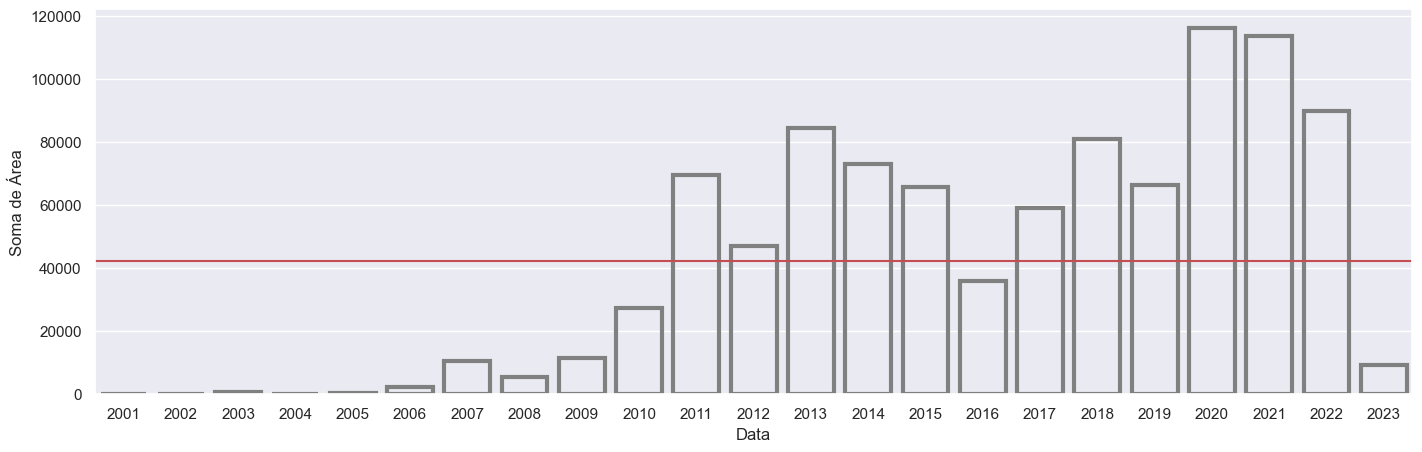

In [64]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})

#Agrupando os valores de area por ano e somando
area_pedida_513 = full_join.query('Data_x >= 2000').groupby('Data_x').sum()

y = sns.barplot(
    data=area_pedida_513, x=area_pedida_513.index, y="QTAreaHA_x", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)
y.axhline(area_pedida_513['QTAreaHA_x'].mean(),color ='r')
y.set(xlabel='Data', ylabel='Soma de Área')
plt.show()

In [68]:
area_pedida_513['QTAreaHA_x'].mean()

42167.68217391304

In [94]:
#Para Regiao Norte
data_regiao_513= full_join.query('Data_x >= 2000').query('Regiao_x == "Norte" ').groupby(['Data_x','Regiao_x','UF_x'], as_index=False).sum()
data_regiao_513.groupby(['UF_x'])['QTAreaHA_x'].sum().sort_values(ascending=True)
#data_regiao_513['QTAreaHA_x'].sum()

UF_x
RR        92.85
TO       666.71
AP      2015.10
RO     81850.97
AM    134072.64
PA    247223.87
Name: QTAreaHA_x, dtype: float64

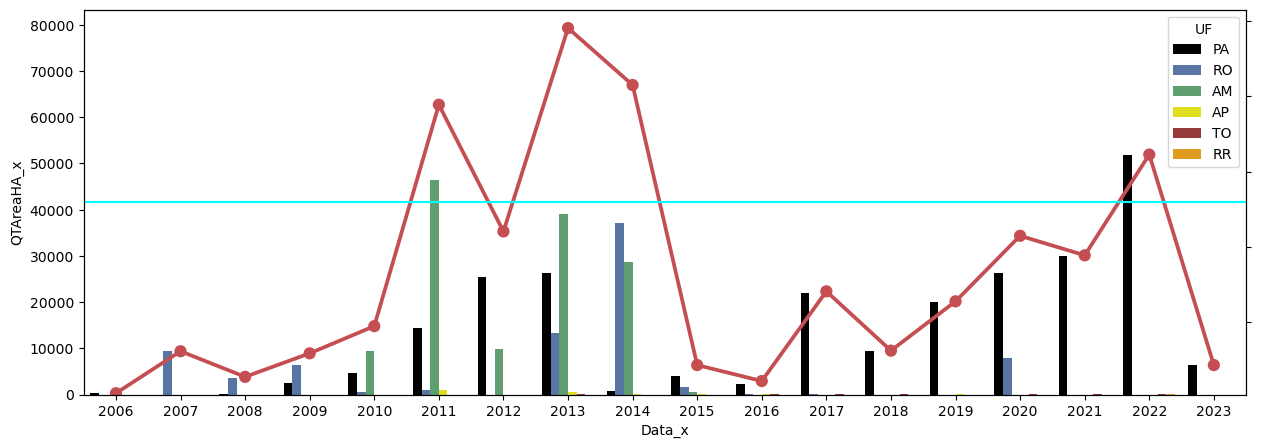

In [90]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


data_regiao_513= full_join.query('Data_x >= 2000').query('Regiao_x == "Norte" ').groupby(['Data_x','Regiao_x','UF_x'], as_index=False).sum()

palette_norte = {'PA':'black','RO':'b','AM':'g','AP':'yellow','RR':'orange','TO':'brown'}
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )


fig, ax1 = plt.subplots(figsize=(15,5))
sns.pointplot(data=data_regiao_513.groupby(['Data_x'],as_index=False)['QTAreaHA_x'].sum(), x="Data_x", y="QTAreaHA_x",ax=ax1,
             color ='r')


ax2 = ax1.twinx()
sns.barplot(data=data_regiao_513, x="Data_x", y="QTAreaHA_x",hue='UF_x',dodge=True,palette = palette_norte,ax=ax1)
ax2.axhline(data_regiao_513.query('Data_x >= 2000')['QTAreaHA_x'].mean(),color ='cyan')

ax2.set(yticklabels=[])
sns.move_legend(ax1, "upper right", title='UF')
plt.show()

In [98]:
#Para Regiao Centro Oeste

data_regiao_513= full_join.query('Data_x >= 2000').query('Regiao_x == "Centro_Oeste" ').groupby(['Data_x','Regiao_x','UF_x'], as_index=False).sum()
data_regiao_513.groupby(['UF_x'])['QTAreaHA_x'].sum().sort_values(ascending=True)
#data_regiao_513['QTAreaHA_x'].sum()

UF_x
GO       233.36
MT    499933.20
Name: QTAreaHA_x, dtype: float64

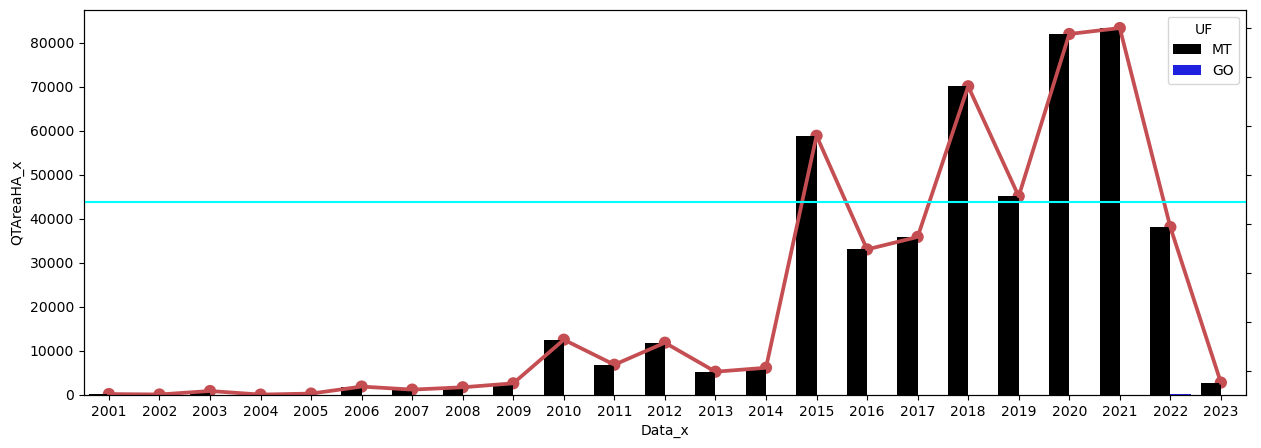

In [99]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


data_regiao_513= full_join.query('Data_x >= 2000').query('Regiao_x == "Centro_Oeste" ').groupby(['Data_x','Regiao_x','UF_x'], as_index=False).sum()

palette_norte = {'MT':'black','GO':'blue'}
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )


fig, ax1 = plt.subplots(figsize=(15,5))
sns.pointplot(data=data_regiao_513.groupby(['Data_x'],as_index=False)['QTAreaHA_x'].sum(), x="Data_x", y="QTAreaHA_x",ax=ax1,
             color ='r')


ax2 = ax1.twinx()
sns.barplot(data=data_regiao_513, x="Data_x", y="QTAreaHA_x",hue='UF_x',dodge=True,palette = palette_norte,ax=ax1)
ax2.axhline(data_regiao_513.query('Data_x >= 2000')['QTAreaHA_x'].mean(),color ='cyan')

ax2.set(yticklabels=[])
sns.move_legend(ax1, "upper right", title='UF')
plt.show()

In [ ]:
#Analisando a Relação de quantidade de área permitida por Pessoa

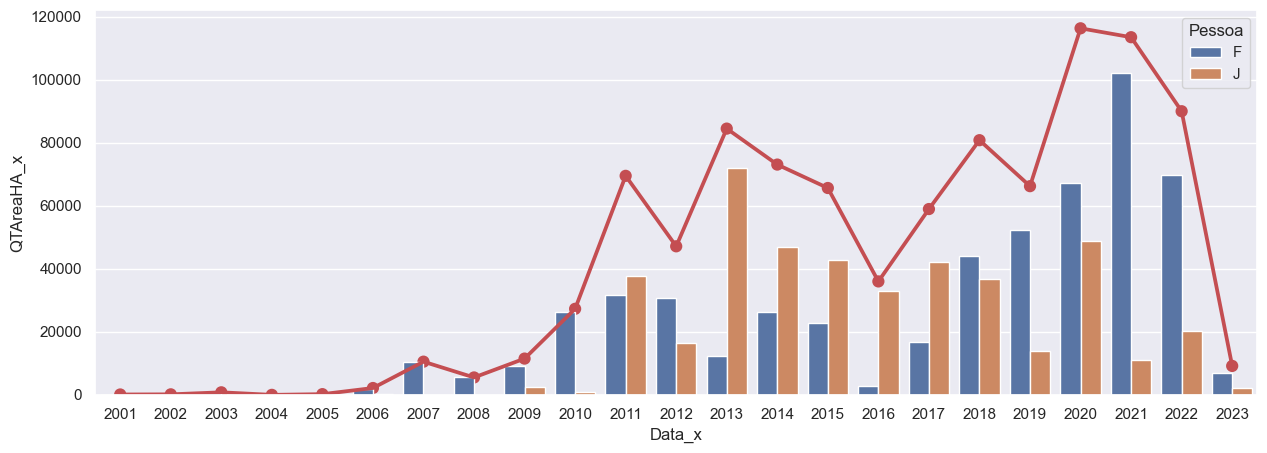

In [164]:
#Para o Brasil
import seaborn as sns
import numpy as np
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
sns.set(rc={"figure.figsize":(17, 5)})
a = pessoa[['DSProcesso','Pessoa','Pessoa_NOME']]
b = full_join.query('Data_x >=2000').merge(a,how='inner',on='DSProcesso')
b.drop_duplicates("DSProcesso",keep='first',inplace=True)
b_pessoa = b.query('Data_x >= 2000').groupby(['Data_x','Pessoa','UF_x'], as_index=False)['QTAreaHA_x'].sum()
data_regiao_513= full_join.query('Data_x >= 2000').groupby(['Data_x','Regiao_x','UF_x'], as_index=False).sum()


fig, ax1 = plt.subplots(figsize=(15,5))
sns.pointplot(data=data_regiao_513.groupby(['Data_x'],as_index=False)['QTAreaHA_x'].sum(), x="Data_x", y="QTAreaHA_x",ax=ax1,
             color ='r')
sns.barplot(data=b_pessoa.groupby(['Data_x','Pessoa'],as_index=False).QTAreaHA_x.sum(), x="Data_x", y="QTAreaHA_x",hue='Pessoa',dodge=True,ax=ax1)
plt.show()






C:\Users\User\AppData\Local\Temp\ipykernel_3496\3759720770.py:15: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_g['Data_x'].between(2000, 2009, inclusive=True),
C:\Users\User\AppData\Local\Temp\ipykernel_3496\3759720770.py:16: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_g['Data_x'].between(2010, 2019, inclusive=True),
C:\Users\User\AppData\Local\Temp\ipykernel_3496\3759720770.py:17: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_g['Data_x'].between(2020, 2023, inclusive=True)


<AxesSubplot: xlabel='Data_x', ylabel='QTAreaHA_x'>

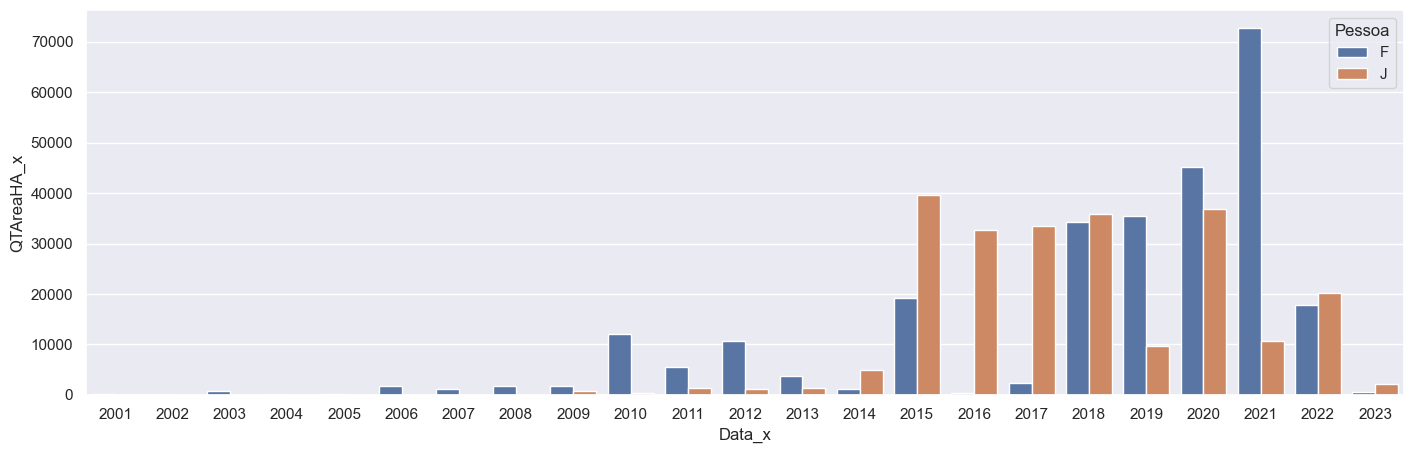

In [147]:
import seaborn as sns
import numpy as np

import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
a = pessoa[['DSProcesso','Pessoa','Pessoa_NOME']]
b = full_join.query('Data_x >=2000').merge(a,how='inner',on='DSProcesso')
b.drop_duplicates("DSProcesso",keep='first',inplace=True)
b_g = b.groupby(['Pessoa','Data_x'],as_index=False).QTAreaHA_x.sum()

b_g['Decadas'] =np.select(
    [
        
        b_g['Data_x'].between(2000, 2009, inclusive=True),
        b_g['Data_x'].between(2010, 2019, inclusive=True),
        b_g['Data_x'].between(2020, 2023, inclusive=True)
    ],
    [
        
        'Década de 2000 - 2009',
        'Década de 2010 - 2019',
        'Década de 2020- 2023'
    ]
)


b_g_g = b_g.groupby(['Decadas','Pessoa'],as_index=False)['QTAreaHA_x'].sum()
b_pessoa = b.query('Data_x >= 2000').groupby(['Data_x','Pessoa','UF_x'], as_index=False)['QTAreaHA_x'].sum()



#sns.barplot(data=b_pessoa.groupby(['Data_x','Pessoa'],as_index=False).QTAreaHA_x.sum(), x="Data_x", y="QTAreaHA_x",hue='Pessoa',dodge=True)


sns.barplot(data=b_pessoa.query('UF_x=="MT"').groupby(['Data_x','Pessoa'],as_index=False).QTAreaHA_x.sum(), x="Data_x", y="QTAreaHA_x",hue='Pessoa',dodge=True)
